In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle


from scipy.stats import sem
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotx
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [18]:
all_out = glob("out/**/*.pkl")

In [19]:
all_out = [load_pickle(p) for p in all_out]

In [20]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "target": out['target']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['baseline']['xgb_metrics']['accuracy'], 
        'f1_macro': out['baseline']['xgb_metrics']['f1_macro'],
        'f1_micro': out['baseline']['xgb_metrics']['f1_micro'],
        'kappa': out['baseline']['xgb_metrics']['kappa'],
        "num_classes": out['num_classes'],
        "target": out['target']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['baseline']['tabpfn_metrics']['accuracy'], 
        'f1_macro': out['baseline']['tabpfn_metrics']['f1_macro'],
        'f1_micro': out['baseline']['tabpfn_metrics']['f1_micro'],
        'kappa': out['baseline']['tabpfn_metrics']['kappa'],
        "num_classes": out['num_classes'],
        "target": out['target']
    }

    
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [21]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [22]:
res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,target
0,10,1.0,0.556,0.514614,0.556,0.112,2,"(logKH_CO2, CO2 Henry coefficient)"
1,10,1.0,0.492,0.485071,0.492,-0.016,2,"(logKH_CO2, CO2 Henry coefficient)"
2,10,1.0,0.600,0.563822,0.600,0.200,2,"(logKH_CH4, CH4 Henry coefficient)"
3,10,1.0,0.536,0.516667,0.536,0.072,2,"(logKH_CH4, CH4 Henry coefficient)"
4,10,1.0,0.524,0.506560,0.524,0.048,2,"(logKH_CH4, CH4 Henry coefficient)"
5,10,1.0,0.456,0.455965,0.456,-0.088,2,"(logKH_CO2, CO2 Henry coefficient)"


In [23]:
grouped_res = res.groupby(['num_classes', "target", 'train_size']).agg(['mean', 'std', sem])

In [29]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'target', 'train_size']).agg(['mean', 'std', sem])

In [30]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'target', 'train_size']).agg(['mean', 'std', sem])

In [31]:
grouped_res.loc[2,:]

frac_valid            accuracy  \
                                                    mean  std  sem      mean   
target                             train_size                                  
(logKH_CH4, CH4 Henry coefficient) 10                1.0  0.0  0.0  0.553333   
(logKH_CO2, CO2 Henry coefficient) 10                1.0  0.0  0.0  0.501333   

                                                                   f1_macro  \
                                                    std       sem      mean   
target                             train_size                                 
(logKH_CH4, CH4 Henry coefficient) 10          0.040857  0.023589  0.529016   
(logKH_CO2, CO2 Henry coefficient) 10          0.050649  0.029242  0.485217   

                                                                   f1_micro  \
                                                    std       sem      mean   
target                             train_size                                 
(logKH_CH4, CH4 Henry coefficient) 10          0.030563  0.017646  0.553333   
(logKH_CO2, CO2 Henry coefficient) 10          0.029325  0.016931  0.501333   

                                                                      kappa  \
                                                    std       sem      mean   
target                             train_size                                 
(logKH_CH4, CH4 Henry coefficient) 10          0.040857  0.023589  0.106667   
(logKH_CO2, CO2 Henry coefficient) 10          0.050649  0.029242  0.002667   

                                                                   
                                                    std       sem  
target                             train_size                      
(logKH_CH4, CH4 Henry coefficient) 10          0.081715  0.047178  
(logKH_CO2, CO2 Henry coefficient) 10          0.101298  0.058485

In [32]:
grouped_xgboost_res

accuracy            \
                                                              mean  std  sem   
num_classes target                             train_size                      
2           (logKH_CH4, CH4 Henry coefficient) 10              0.5  0.0  0.0   
            (logKH_CO2, CO2 Henry coefficient) 10              0.5  0.0  0.0   

                                                           f1_macro            \
                                                               mean  std  sem   
num_classes target                             train_size                       
2           (logKH_CH4, CH4 Henry coefficient) 10          0.333333  0.0  0.0   
            (logKH_CO2, CO2 Henry coefficient) 10          0.333333  0.0  0.0   

                                                          f1_micro            \
                                                              mean  std  sem   
num_classes target                             train_size                      
2           (logKH_CH4, CH4 Henry coefficient) 10              0.5  0.0  0.0   
            (logKH_CO2, CO2 Henry coefficient) 10              0.5  0.0  0.0   

                                                          kappa            
                                                           mean  std  sem  
num_classes target                             train_size                  
2           (logKH_CH4, CH4 Henry coefficient) 10           0.0  0.0  0.0  
            (logKH_CO2, CO2 Henry coefficient) 10           0.0  0.0  0.0

In [33]:
grouped_res.loc[2,:].index[0][0]

('logKH_CH4', 'CH4 Henry coefficient')

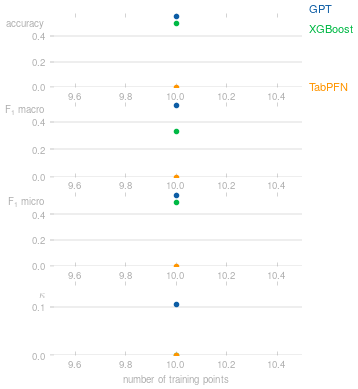

In [34]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :].index,
            grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :].index,
            grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'] - grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['sem'],
            grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'] + grouped_res.loc[2, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] - grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] + grouped_xgboost_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] - grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] + grouped_tabpfn_res.loc[2,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            alpha=0.2,
        )


    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig('logKHCH4-classification_results_binary.pdf', bbox_inches='tight')

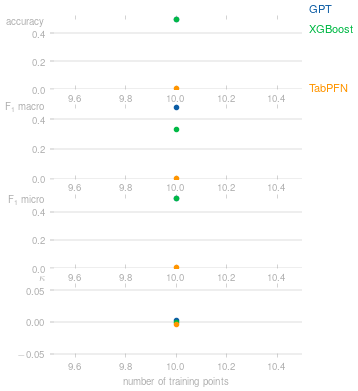

In [35]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :].index,
            grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :].index,
            grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :][metric]['mean'] - grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :][metric]['sem'],
            grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :][metric]['mean'] + grouped_res.loc[2, ('logKH_CO2', 'CO2 Henry coefficient'), :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'] - grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['sem'],
            grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'] + grouped_xgboost_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'] - grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['sem'],
            grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['mean'] + grouped_tabpfn_res.loc[2,('logKH_CO2', 'CO2 Henry coefficient'),:][metric]['sem'],
            alpha=0.2,
        )


    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig('logKHCO2-classification_results_binary.pdf', bbox_inches='tight')

KeyError: 5

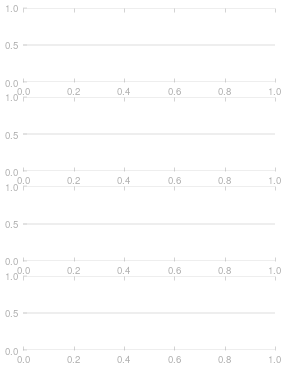

In [36]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :].index,
            grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'],
            marker='o',
            label='GPT',
        )
        ax[i].fill_between(
            grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :].index,
            grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'] - grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['sem'],
            grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['mean'] + grouped_res.loc[5, ('logKH_CH4', 'CH4 Henry coefficient'), :][metric]['sem'],
            alpha=0.5,
        )


        ax[i].plot(
            grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] - grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] + grouped_xgboost_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:].index,
            grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] - grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['mean'] + grouped_tabpfn_res.loc[5,('logKH_CH4', 'CH4 Henry coefficient'),:][metric]['sem'],
            alpha=0.5,
        )


    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig('logKHCH4-classification_results_5.pdf', bbox_inches='tight')